In [64]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
# Read DataSet
dataset = pd.read_csv("50_startups.csv")
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


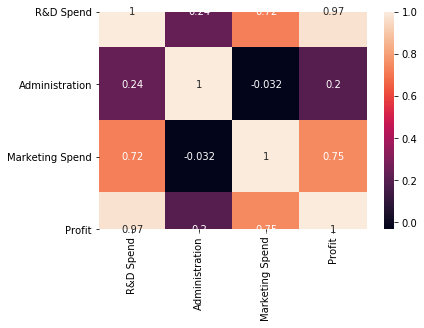

In [42]:
sns.heatmap(dataset.corr(), annot=True)

In [55]:
# Convert to Categorical data to numerical data
from sklearn.preprocessing import OneHotEncoder

# getdummies convert the categorical to numerical 
pd.get_dummies(dataset.State)
dataset.iloc[:,0:3]

processDS = pd.concat([dataset.iloc[:,0:3], pd.get_dummies(dataset.State)], axis=1)
processDS

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


(5, 0)

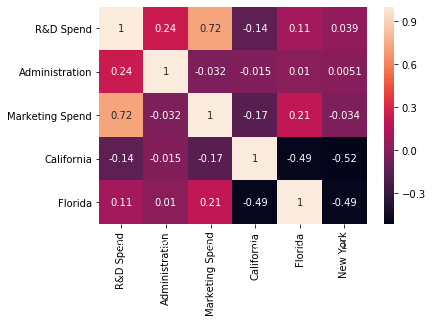

In [46]:
ax = sns.heatmap(processDS.corr(), annot=True)
ax.set_ylim(5,0)

In [56]:
processDS=processDS.drop(columns=processDS.columns[-1])
processDS

,R&D Spend,Administration,Marketing Spend,California,Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


In [117]:
# Split dataset X (Independent) & Y (Dependent)
X = processDS.values # Independent Variable [ strt:end columns which are independent ]
Y = dataset[dataset.columns[-1]].values # Dependent Variable [column which is dependent]

(50,)

In [111]:
# Divide dataset  into training and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2 , random_state=0)

In [112]:
# Implement  Classifier
regressor = LinearRegression()
regressor.fit(X_train,Y_train) # learning
Y_predict=regressor.predict(X_test) # prediction

In [137]:
X_test

array([[6.6051520e+04, 1.8264556e+05, 1.1814820e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 1.0000000e+00,
        0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 0.0000000e+00,
        1.0000000e+00],
       [2.7892920e+04, 8.4710770e+04, 1.6447071e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        1.0000000e+00],
       [7.2107600e+04, 1.2786455e+05, 3.5318381e+05, 0.0000000e+00,
        0.0000000e+00],
       [2.0229590e+04, 6.5947930e+04, 1.8526510e+05, 0.0000000e+00,
        0.0000000e+00],
       [6.1136380e+04, 1.5270192e+05, 8.8218230e+04, 0.0000000e+00,
        0.0000000e+00],
       [7.3994560e+04, 1.2278275e+05, 3.0331926e+05, 0.0000000e+00,
        1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        1.0000000e+00]])

In [116]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [114]:
Y_predict

array([103015.20159776, 132582.27760831, 132447.73845184,  71976.09851266,
       178537.4822107 , 116161.24230157,  67851.69209689,  98791.73374679,
       113969.43533008, 167921.06569569])

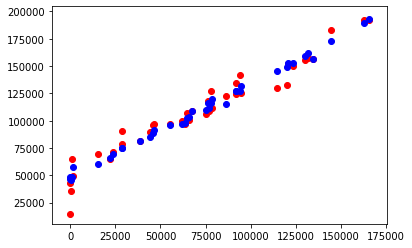

In [135]:
plt.scatter(X_train[:,0:1],Y_train,color = "red")
plt.scatter(X_train[:,0:1],regressor.predict(X_train),color="blue") # best fit line

In [136]:
type(X_train)

numpy.ndarray

In [138]:
# Calculate the R squared value
from sklearn.metrics import r2_score
r2_score(Y_test,Y_predict)

0.9347068473294997

In [139]:
regressor.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -6.99369053e+02,
       -1.65865321e+03])

In [140]:
regressor.intercept_

43253.53667068359

In [153]:
 # Build the optimal model using Backward Elimination
import statsmodels.formula.api as sm

In [142]:
X = np.append(arr=np.ones((50,1)).astype(int), values = X , axis=1)

In [152]:
X.shape

(50, 6)

In [160]:
X_opt = X[:,[0,1,2,3,4,5]]
regressor_OLS = sm.ols(formula="",data=Y,suX_opt).fit

SyntaxError: positional argument follows keyword argument (<ipython-input-160-a635f3de91e4>, line 2)

In [148]:
regressor_.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [159]:
?sm.ols